In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from torch.optim.lr_scheduler import LambdaLR
import math
import copy
import pickle
#from matplotlib import pyplot as plt
#from sklearn.preprocessing import StandardScaler
#from sklearn.decomposition import PCA
import csv
# import torchtext
# from torchtext.data.utils import get_tokenizer
# from torchtext.vocab import build_vocab_from_iterator
# from torchtext.vocab import vocab
from collections import Counter, OrderedDict
import pickle
import numpy as np
from torch.utils.data import DataLoader
# from google.colab import drive
from tqdm import tqdm
# import code_tokenize as ctok
from tokenizers import Tokenizer, decoders, models, normalizers, pre_tokenizers, trainers
from transformers import PreTrainedTokenizerFast
# import tiktoken
import re
# from tokenizers.trainers import BpeTrainer
# from tokenizers.pre_tokenizers import Whitespace
# from tokenizers import Tokenizer
# from tokenizers.models import BPE

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
max = 64 # 64 24 6000
torch.manual_seed(0)

/home/athip/pyenv/pythorch2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device

device(type='cuda')

In [4]:
data_row_split = []
data_row_questions  = []
data_row_answers = []
mem = ""
count = 0
with open("data/question_answer_stackoverflow_python_sort_by_score_top_200000_questions_585839_answers.csv","r",encoding="utf8") as f:
    reader = csv.reader(f)
    for rows in reader:
      if (len(rows[0].strip()) != 0) and (len(rows[1].strip()) != 0):
        if rows[0] == mem : continue
        else : mem = rows[0]
        if (len(re.findall("#.+\n",rows[1])) > 0):
          c0 = rows[0]
          c1 = rows[1]
          for i in re.findall("#.+\n",rows[1]):
            c1 = c1.replace(i,"\n")
          data_row_split.append([c0,c1])
          data_row_questions.append(c0)
          data_row_answers.append(c1)
        else:
          data_row_split.append(rows)
          data_row_questions.append(rows[0])
          data_row_answers.append(rows[1])
          #data_row_answers.append("<BOS>"+rows[1]+"<EOS>")
          count += 1

In [7]:
list_char = []
for i in range(ord('!'),ord('~')):
    list_char.append(chr(i))

In [21]:
len(list_char)

93

In [70]:
tokenizer_a = Tokenizer(models.BPE())
tokenizer_a.normalizer = normalizers.NFKC()
tokenizer_a.pre_tokenizer = pre_tokenizers.BertPreTokenizer()
tokenizer_a.decoder = decoders.BPEDecoder()
tokenizer_a.add_tokens(["<PAD>", "<BOS>", "<EOS>","<UNK>","class ","def ","__init__","return ","lambda ","yield ","for "," for ","if ","elif ","else","assert ","except","except ","finally","raise "," or "," and "," not "," is ","int"," int ","int "," int","float"," float ","float "," float","string"," string ","string "," string","bool"," bool "," bool","bool "," as ","from ","import "," import ","while "," = "," == "," in ","(",")",":",".","\n","\n        ","\n      ","\n     ","\n    ","\n   ","\n  ",">","<",'"',"'","+","-","*","/","//","%",",","[","]","{","}","(",")","=",">=","<=","+=","-=","#",", "," ,"," , "," -> "] + list_char )
# trainer_a = trainers.BpeTrainer(
#     vocab_size=6000,
#     special_tokens=["<PAD>", "<BOS>", "<EOS>","<UNK>","class ","def ","__init__","return ","lambda ","yield ","for "," for ","if ","elif ","else","assert ","except","except ","finally","raise "," or "," and "," not "," is ","int"," int ","int "," int","float"," float ","float "," float","string"," string ","string "," string","bool"," bool "," bool","bool "," as ","from ","import "," import ","while "," = "," == "," in ","(",")",":",".","\n","\n        ","\n      ","\n     ","\n    ","\n   ","\n  ",">","<",'"',"'","+","-","*","/","//","%",",","[","]","{","}","(",")","=",">=","<=","+=","-=","#",", "," ,"," , "," -> "] + list_char ,
#     unk_token="<UNK>",
#     show_progress=True,
#     max_token_length = 1,
#     min_frequency = 1,
#     limit_alphabet = 26*3

# )#"  ","   ","    ","     ","      ","       ","        "

157

In [105]:
tokenizer_q = Tokenizer(models.BPE())
tokenizer_q.normalizer = normalizers.NFKC()
tokenizer_q.pre_tokenizer = pre_tokenizers.BertPreTokenizer()
tokenizer_q.decoder = decoders.BPEDecoder()
trainer_q = trainers.BpeTrainer(
    vocab_size=6000,
    special_tokens=["<PAD>", "<BOS>", "<EOS>","<UNK>"],
    unk_token="<UNK>",
    show_progress=True,
    max_token_length = 10,
    min_frequency = 500,
    limit_alphabet = 26*3

)#"  ","   ","    ","     ","      ","       ","        "

Ignored unknown kwargs option unk_token


In [72]:
len(tokenizer_a.get_vocab())

157

In [106]:
tokenizer_q.train_from_iterator(data_row_questions, trainer=trainer_q)

In [107]:
len(tokenizer_q.get_vocab())

2725

In [108]:
tokenizer_q.get_vocab()

{'roup': 375,
 'Popen': 2360,
 'Compare': 2357,
 'post': 1504,
 'al': 99,
 'By': 1822,
 'removing': 2290,
 'deal': 2600,
 'Key': 1120,
 'When': 1554,
 'password': 1730,
 'soup': 2658,
 'ren': 1358,
 'having': 2311,
 'cy': 701,
 'inting': 1236,
 'Char': 1655,
 'digit': 2401,
 'ast': 494,
 'words': 890,
 'style': 1570,
 'ue': 425,
 'Memory': 2547,
 'chunk': 1941,
 'racti': 1956,
 'ask': 722,
 'psycopg2': 2342,
 'just': 1503,
 'gn': 478,
 'tect': 960,
 'formation': 1878,
 'escape': 2370,
 'right': 1563,
 'lect': 657,
 '8': 22,
 'di': 124,
 'ging': 645,
 'ped': 1809,
 'imported': 2110,
 'scatter': 1850,
 'returns': 1260,
 'ongo': 1648,
 'gi': 2557,
 'ay': 181,
 'gorith': 1247,
 'Testing': 2702,
 'List': 665,
 'Saving': 2499,
 'graph': 850,
 'Dict': 1590,
 'sci': 735,
 'reh': 819,
 'del': 361,
 'stdin': 2286,
 'extension': 1534,
 'random': 620,
 'Bo': 1337,
 'lates': 1986,
 'PDF': 1532,
 'Exception': 1430,
 'mutable': 2170,
 'seconds': 1539,
 'train': 1329,
 'plotting': 2559,
 'Dist': 2354,

In [109]:
# tokenizer_a.save("/home/athip/psu/2/22/machine_learning2/project_zero/ProjMachine2GenerateCode/debug/model_text_to_text(code)/code/use_data/final_data_model/data/tokenizer/save_tokenizer_a_BEP_model_base_157.json")

In [110]:
# tokenizer_q.save("/home/athip/psu/2/22/machine_learning2/project_zero/ProjMachine2GenerateCode/debug/model_text_to_text(code)/code/use_data/final_data_model/data/tokenizer/save_tokenizer_q_BEP_model_base_2725_10_500_26*3.json")

In [9]:
tokenizer_a = PreTrainedTokenizerFast(tokenizer_file="data/tokenizer/save_tokenizer_a_BEP_model_base_157.json")

In [10]:
tokenizer_q = PreTrainedTokenizerFast(tokenizer_file="data/tokenizer/save_tokenizer_q_BEP_model_base_2725_10_500_26*3.json")

In [11]:
encode_pipeline = lambda x: tokenizer_q.encode(x)
decode_pipeline = lambda x: tokenizer_a.encode(x)

In [6]:
count = 0
def data_for_train(batch):
  global count
  all_data = []
  if count < 1:
    for q,a in batch:
      encode_pip = encode_pipeline(q)
      decode_pip = decode_pipeline(a)
      decode_pip.insert(0,1)
      decode_pip.append(2)
      if len(decode_pip) > max:
        for i in range(len(decode_pip)-max):
          if i < max:
            all_data.append([encode_pip,decode_pip[:i+1],decode_pip[:max+i+2]])
          else :
            all_data.append([encode_pip,decode_pip[i:max+i],decode_pip[i+1:max+i+1]])
      else:
        for i in range(len(decode_pip)-1):
          all_data.append([encode_pip,decode_pip[:i+1],decode_pip[:i+2]])
      # for i in range(len(decode_pip)-1):
      #   all_data.append([encode_pip,decode_pip[:i+1],decode_pip[:i+2]])
    with open(f"data/data_for_trains/data_for_train_157_token{count*10000}_{(count+1)*10000}_row.pickle","wb") as f:
      pickle.dump(all_data,f)
  count += 1
  print(count)
  return 0
train_iter = data_row_split[1:]
dataloader = DataLoader(
    train_iter, batch_size=10000, shuffle=False, collate_fn=data_for_train
)

In [ ]:
count = 0
def data_for_train(batch):
  global count
  all_data = []
  if count < 1:
    for q,a in batch:
      encode_pip = encode_pipeline(q)
      decode_pip = decode_pipeline(a)
      decode_pip.insert(0,1)
      decode_pip.append(2)
      if len(decode_pip) >= max:
        for i in range(len(decode_pip)-1):
          if i < (max-1):
            print("ski")
            all_data.append([encode_pip,decode_pip[:i+1],decode_pip[:i+2]])
          else :
            all_data.append([encode_pip,decode_pip[i-(max-1):i+1],decode_pip[i-(max-2):i+2]])
      else:
        for i in range(len(decode_pip)-1):
          all_data.append([encode_pip,decode_pip[:i+1],decode_pip[:i+2]])
      # for i in range(len(decode_pip)-1):
      #   all_data.append([encode_pip,decode_pip[:i+1],decode_pip[:i+2]])
    with open(f"data/data_for_trains/data_for_train_157_token{count*10000}_{(count+1)*10000}_row.pickle","wb") as f:
      pickle.dump(all_data,f)
  count += 1
  print(count)
  return 0
train_iter = data_row_split[1:]
dataloader = DataLoader(
    train_iter, batch_size=10000, shuffle=False, collate_fn=data_for_train
)

In [122]:
for _ in dataloader:
    pass

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


In [7]:
encode_pipeline = lambda x: tokenizer_q.encode(x)
decode_pipeline = lambda x: tokenizer_a.encode(x)

In [6]:
encode_pipeline(data_row_questions[1])

[293, 300, 118, 4, 1650, 4, 1416, 144, 82, 101, 26]

In [7]:
tokenizer_q.decode(encode_pipeline(data_row_questions[1]))

'Whatdoesthe"yield"keyworddoinPython?'

In [9]:
print(tokenizer_a.decode(tokenizer_a.encode(data_row_answers[1])))

mylist = [1, 2, 3]
for i in mylist:
   print(i)


In [21]:
print(data_row_answers[1])

mylist = [1, 2, 3]
for i in mylist:
   print(i)


In [8]:
with open("data/data_for_trains/data_for_train_157_token0_10000_row_no_question.pickle","rb") as f:
  train_data = pickle.load(f)[:70000]

In [62]:
p = 0
for i in train_data[:70000]:
    p += len(i[1])

In [63]:
p

3378606

In [9]:
def collate_batch(batch):
    encode_list, decode_list, output_list = [], [], []
    for encode,decode,output in batch:
        processed_encode = torch.nn.functional.pad(torch.tensor(encode, dtype=torch.int64),[0,max-len(encode)],'constant',0)
        processed_decode = torch.nn.functional.pad(torch.tensor(decode, dtype=torch.int64),[0,max-len(decode)],'constant',0)
        processed_output = torch.nn.functional.pad(torch.tensor(output, dtype=torch.int64),[0,max-len(output)],'constant',0)
        encode_list.append(processed_encode.unsqueeze(0))
        decode_list.append(processed_decode.unsqueeze(0))
        output_list.append(processed_output.unsqueeze(0))

    encode_list = torch.cat(encode_list,0)
    decode_list = torch.cat(decode_list,0)
    output_list = torch.cat(output_list,0)
    return encode_list.to(device), decode_list.to(device),output_list.to(device)#, offsets.to(device)


train_iter = train_data[:1000]
dataloader = DataLoader(
    train_iter, batch_size=100, shuffle=True, collate_fn=collate_batch
)

In [2]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        # Ensure that the model dimension (d_model) is divisible by the number of heads
        assert d_model % num_heads == 0, "d_model must be divisible by num_heads"

        # Initialize dimensions
        self.d_model = d_model # Model's dimension
        self.num_heads = num_heads # Number of attention heads
        self.d_k = d_model // num_heads # Dimension of each head's key, query, and value

        # Linear layers for transforming inputs
        self.W_q = nn.Linear(d_model, d_model) # Query transformation
        self.W_k = nn.Linear(d_model, d_model) # Key transformation
        self.W_v = nn.Linear(d_model, d_model) # Value transformation
        self.W_o = nn.Linear(d_model, d_model) # Output transformation

    def scaled_dot_product_attention(self, Q, K, V, mask=None):
        # Calculate attention scores
        attn_scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.d_k)

        # Apply mask if provided (useful for preventing attention to certain parts like padding)
        if mask is not None:
            attn_scores = attn_scores.masked_fill(mask == 0, -1e9)

        # Softmax is applied to obtain attention probabilities
        attn_probs = torch.softmax(attn_scores, dim=-1)

        # Multiply by values to obtain the final output
        output = torch.matmul(attn_probs, V)
        return output

    def split_heads(self, x):
        # Reshape the input to have num_heads for multi-head attention
        batch_size, seq_length, d_model = x.size()
        return x.view(batch_size, seq_length, self.num_heads, self.d_k).transpose(1, 2)

    def combine_heads(self, x):
        # Combine the multiple heads back to original shape
        batch_size, _, seq_length, d_k = x.size()
        return x.transpose(1, 2).contiguous().view(batch_size, seq_length, self.d_model)

    def forward(self, Q, K, V, mask=None):
        # Apply linear transformations and split heads
        self.W_q(Q)
        Q = self.split_heads(self.W_q(Q))
        K = self.split_heads(self.W_k(K))
        V = self.split_heads(self.W_v(V))

        # Perform scaled dot-product attention
        attn_output = self.scaled_dot_product_attention(Q, K, V, mask)

        # Combine heads and apply output transformation
        output = self.W_o(self.combine_heads(attn_output))
        return output

In [3]:
class PositionWiseFeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(PositionWiseFeedForward, self).__init__()
        self.fc1 = nn.Linear(d_model, d_ff)
        self.fc2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.fc2(self.relu(self.fc1(x)))

In [4]:
class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_seq_length):
        super(PositionalEncoding, self).__init__()

        pe = torch.zeros(max_seq_length, d_model)
        position = torch.arange(0, max_seq_length, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(math.log(10000.0) / d_model))

        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)

        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

In [5]:
class EncoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(EncoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        attn_output = self.self_attn(x, x, x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

In [6]:
class DecoderLayer(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadAttention(d_model, num_heads)
        self.cross_attn = MultiHeadAttention(d_model, num_heads)
        self.feed_forward = PositionWiseFeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask, tgt_mask):
        attn_output = self.self_attn(x, x, x, tgt_mask)
        x = self.norm1(x + self.dropout(attn_output))
        attn_output = self.cross_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(attn_output))
        ff_output = self.feed_forward(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x

In [7]:
class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout):
        super(Transformer, self).__init__()
        self.encoder_embedding = nn.Embedding(src_vocab_size, d_model)
        self.decoder_embedding = nn.Embedding(tgt_vocab_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model, max_seq_length)

        self.encoder_layers = nn.ModuleList([EncoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])
        self.decoder_layers = nn.ModuleList([DecoderLayer(d_model, num_heads, d_ff, dropout) for _ in range(num_layers)])

        self.fc = nn.Linear(d_model, tgt_vocab_size)
        self.dropout = nn.Dropout(dropout)
        self.softmax = nn.Softmax(dim=2)

    def generate_mask(self, src, tgt):
        src_mask = (src != 0).unsqueeze(1).unsqueeze(2)
        tgt_mask = (tgt != 0).unsqueeze(1).unsqueeze(3)
        seq_length = tgt.size(1)
        nopeak_mask = (1 - torch.triu(torch.ones(1, seq_length, seq_length), diagonal=1)).bool().to(device)
        tgt_mask = tgt_mask & nopeak_mask
        # src_mask = src_mask & nopeak_mask
        return src_mask, tgt_mask

    def forward(self, src, tgt):
        src_mask, tgt_mask = self.generate_mask(src, tgt)
        # print(src.shape)
        src_mask = None
        # tgt_mask = None
        src_embedded = self.dropout(self.positional_encoding(self.encoder_embedding(src)))
        tgt_embedded = self.dropout(self.positional_encoding(self.decoder_embedding(tgt)))

        # torch.cuda.empty_cache()
        enc_output = src_embedded
        for enc_layer in self.encoder_layers:
            # torch.cuda.empty_cache()
            enc_output = enc_layer(enc_output, src_mask)

        # torch.cuda.empty_cache()
        dec_output = tgt_embedded
        for dec_layer in self.decoder_layers:
            # torch.cuda.empty_cache()
            dec_output = dec_layer(dec_output, enc_output, src_mask, tgt_mask)

        output = self.fc(dec_output)
        # output = self.softmax(output)
        return output

In [12]:
src_vocab_size = len(tokenizer_q.get_vocab())
tgt_vocab_size = len(tokenizer_a.get_vocab())
d_model = int(768//2)
num_heads = int(12//2)
num_layers = int(12//2)
d_ff = int(1024//2)
max_seq_length = max
dropout = 0.1

transformer = Transformer(src_vocab_size, tgt_vocab_size, d_model, num_heads, num_layers, d_ff, max_seq_length, dropout).to(device)

In [29]:
transformer.load_state_dict(torch.load("model_save/model_batch_100_seq64_layer6_hlayer6_dmodel384_token157_newd_100token_cp1.pt"))

<All keys matched successfully>

In [13]:
transformer.eval()

Transformer(
  (encoder_embedding): Embedding(2725, 384)
  (decoder_embedding): Embedding(157, 384)
  (positional_encoding): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0-5): 6 x EncoderLayer(
      (self_attn): MultiHeadAttention(
        (W_q): Linear(in_features=384, out_features=384, bias=True)
        (W_k): Linear(in_features=384, out_features=384, bias=True)
        (W_v): Linear(in_features=384, out_features=384, bias=True)
        (W_o): Linear(in_features=384, out_features=384, bias=True)
      )
      (feed_forward): PositionWiseFeedForward(
        (fc1): Linear(in_features=384, out_features=512, bias=True)
        (fc2): Linear(in_features=512, out_features=384, bias=True)
        (relu): ReLU()
      )
      (norm1): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      (norm2): LayerNorm((384,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (decoder_layers): ModuleList(
    (0-5): 6 x DecoderLayer(
    

In [14]:
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad:
            continue
        params = parameter.numel()
        table.add_row([name, params])
        total_params += params
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params
    
count_parameters(transformer)

+------------------------------------------+------------+
|                 Modules                  | Parameters |
+------------------------------------------+------------+
|         encoder_embedding.weight         |  1046400   |
|         decoder_embedding.weight         |   60288    |
|  encoder_layers.0.self_attn.W_q.weight   |   147456   |
|   encoder_layers.0.self_attn.W_q.bias    |    384     |
|  encoder_layers.0.self_attn.W_k.weight   |   147456   |
|   encoder_layers.0.self_attn.W_k.bias    |    384     |
|  encoder_layers.0.self_attn.W_v.weight   |   147456   |
|   encoder_layers.0.self_attn.W_v.bias    |    384     |
|  encoder_layers.0.self_attn.W_o.weight   |   147456   |
|   encoder_layers.0.self_attn.W_o.bias    |    384     |
| encoder_layers.0.feed_forward.fc1.weight |   196608   |
|  encoder_layers.0.feed_forward.fc1.bias  |    512     |
| encoder_layers.0.feed_forward.fc2.weight |   196608   |
|  encoder_layers.0.feed_forward.fc2.bias  |    384     |
|      encoder

16563997

In [ ]:
+------------------------------------------+------------+
|                 Modules                  | Parameters |
+------------------------------------------+------------+
|         encoder_embedding.weight         |  1046400   |
|         decoder_embedding.weight         |   60288    |
|  encoder_layers.0.self_attn.W_q.weight   |   147456   |
|   encoder_layers.0.self_attn.W_q.bias    |    384     |
|  encoder_layers.0.self_attn.W_k.weight   |   147456   |
|   encoder_layers.0.self_attn.W_k.bias    |    384     |
|  encoder_layers.0.self_attn.W_v.weight   |   147456   |
|   encoder_layers.0.self_attn.W_v.bias    |    384     |
|  encoder_layers.0.self_attn.W_o.weight   |   147456   |
|   encoder_layers.0.self_attn.W_o.bias    |    384     |
| encoder_layers.0.feed_forward.fc1.weight |   196608   |
|  encoder_layers.0.feed_forward.fc1.bias  |    512     |
| encoder_layers.0.feed_forward.fc2.weight |   196608   |
|  encoder_layers.0.feed_forward.fc2.bias  |    384     |
|      encoder_layers.0.norm1.weight       |    384     |
|       encoder_layers.0.norm1.bias        |    384     |
|      encoder_layers.0.norm2.weight       |    384     |
|       encoder_layers.0.norm2.bias        |    384     |
|  encoder_layers.1.self_attn.W_q.weight   |   147456   |
|   encoder_layers.1.self_attn.W_q.bias    |    384     |
|  encoder_layers.1.self_attn.W_k.weight   |   147456   |
|   encoder_layers.1.self_attn.W_k.bias    |    384     |
|  encoder_layers.1.self_attn.W_v.weight   |   147456   |
|   encoder_layers.1.self_attn.W_v.bias    |    384     |
|  encoder_layers.1.self_attn.W_o.weight   |   147456   |
|   encoder_layers.1.self_attn.W_o.bias    |    384     |
| encoder_layers.1.feed_forward.fc1.weight |   196608   |
|  encoder_layers.1.feed_forward.fc1.bias  |    512     |
| encoder_layers.1.feed_forward.fc2.weight |   196608   |
|  encoder_layers.1.feed_forward.fc2.bias  |    384     |
|      encoder_layers.1.norm1.weight       |    384     |
|       encoder_layers.1.norm1.bias        |    384     |
|      encoder_layers.1.norm2.weight       |    384     |
|       encoder_layers.1.norm2.bias        |    384     |
|  encoder_layers.2.self_attn.W_q.weight   |   147456   |
|   encoder_layers.2.self_attn.W_q.bias    |    384     |
|  encoder_layers.2.self_attn.W_k.weight   |   147456   |
|   encoder_layers.2.self_attn.W_k.bias    |    384     |
|  encoder_layers.2.self_attn.W_v.weight   |   147456   |
|   encoder_layers.2.self_attn.W_v.bias    |    384     |
|  encoder_layers.2.self_attn.W_o.weight   |   147456   |
|   encoder_layers.2.self_attn.W_o.bias    |    384     |
| encoder_layers.2.feed_forward.fc1.weight |   196608   |
|  encoder_layers.2.feed_forward.fc1.bias  |    512     |
| encoder_layers.2.feed_forward.fc2.weight |   196608   |
|  encoder_layers.2.feed_forward.fc2.bias  |    384     |
|      encoder_layers.2.norm1.weight       |    384     |
|       encoder_layers.2.norm1.bias        |    384     |
|      encoder_layers.2.norm2.weight       |    384     |
|       encoder_layers.2.norm2.bias        |    384     |
|  encoder_layers.3.self_attn.W_q.weight   |   147456   |
|   encoder_layers.3.self_attn.W_q.bias    |    384     |
|  encoder_layers.3.self_attn.W_k.weight   |   147456   |
|   encoder_layers.3.self_attn.W_k.bias    |    384     |
|  encoder_layers.3.self_attn.W_v.weight   |   147456   |
|   encoder_layers.3.self_attn.W_v.bias    |    384     |
|  encoder_layers.3.self_attn.W_o.weight   |   147456   |
|   encoder_layers.3.self_attn.W_o.bias    |    384     |
| encoder_layers.3.feed_forward.fc1.weight |   196608   |
|  encoder_layers.3.feed_forward.fc1.bias  |    512     |
| encoder_layers.3.feed_forward.fc2.weight |   196608   |
|  encoder_layers.3.feed_forward.fc2.bias  |    384     |
|      encoder_layers.3.norm1.weight       |    384     |
|       encoder_layers.3.norm1.bias        |    384     |
|      encoder_layers.3.norm2.weight       |    384     |
|       encoder_layers.3.norm2.bias        |    384     |
|  encoder_layers.4.self_attn.W_q.weight   |   147456   |
|   encoder_layers.4.self_attn.W_q.bias    |    384     |
|  encoder_layers.4.self_attn.W_k.weight   |   147456   |
|   encoder_layers.4.self_attn.W_k.bias    |    384     |
|  encoder_layers.4.self_attn.W_v.weight   |   147456   |
|   encoder_layers.4.self_attn.W_v.bias    |    384     |
|  encoder_layers.4.self_attn.W_o.weight   |   147456   |
|   encoder_layers.4.self_attn.W_o.bias    |    384     |
| encoder_layers.4.feed_forward.fc1.weight |   196608   |
|  encoder_layers.4.feed_forward.fc1.bias  |    512     |
| encoder_layers.4.feed_forward.fc2.weight |   196608   |
|  encoder_layers.4.feed_forward.fc2.bias  |    384     |
|      encoder_layers.4.norm1.weight       |    384     |
|       encoder_layers.4.norm1.bias        |    384     |
|      encoder_layers.4.norm2.weight       |    384     |
|       encoder_layers.4.norm2.bias        |    384     |
|  encoder_layers.5.self_attn.W_q.weight   |   147456   |
|   encoder_layers.5.self_attn.W_q.bias    |    384     |
|  encoder_layers.5.self_attn.W_k.weight   |   147456   |
|   encoder_layers.5.self_attn.W_k.bias    |    384     |
|  encoder_layers.5.self_attn.W_v.weight   |   147456   |
|   encoder_layers.5.self_attn.W_v.bias    |    384     |
|  encoder_layers.5.self_attn.W_o.weight   |   147456   |
|   encoder_layers.5.self_attn.W_o.bias    |    384     |
| encoder_layers.5.feed_forward.fc1.weight |   196608   |
|  encoder_layers.5.feed_forward.fc1.bias  |    512     |
| encoder_layers.5.feed_forward.fc2.weight |   196608   |
|  encoder_layers.5.feed_forward.fc2.bias  |    384     |
|      encoder_layers.5.norm1.weight       |    384     |
|       encoder_layers.5.norm1.bias        |    384     |
|      encoder_layers.5.norm2.weight       |    384     |
|       encoder_layers.5.norm2.bias        |    384     |
|  decoder_layers.0.self_attn.W_q.weight   |   147456   |
|   decoder_layers.0.self_attn.W_q.bias    |    384     |
|  decoder_layers.0.self_attn.W_k.weight   |   147456   |
|   decoder_layers.0.self_attn.W_k.bias    |    384     |
|  decoder_layers.0.self_attn.W_v.weight   |   147456   |
|   decoder_layers.0.self_attn.W_v.bias    |    384     |
|  decoder_layers.0.self_attn.W_o.weight   |   147456   |
|   decoder_layers.0.self_attn.W_o.bias    |    384     |
|  decoder_layers.0.cross_attn.W_q.weight  |   147456   |
|   decoder_layers.0.cross_attn.W_q.bias   |    384     |
|  decoder_layers.0.cross_attn.W_k.weight  |   147456   |
|   decoder_layers.0.cross_attn.W_k.bias   |    384     |
|  decoder_layers.0.cross_attn.W_v.weight  |   147456   |
|   decoder_layers.0.cross_attn.W_v.bias   |    384     |
|  decoder_layers.0.cross_attn.W_o.weight  |   147456   |
|   decoder_layers.0.cross_attn.W_o.bias   |    384     |
| decoder_layers.0.feed_forward.fc1.weight |   196608   |
|  decoder_layers.0.feed_forward.fc1.bias  |    512     |
| decoder_layers.0.feed_forward.fc2.weight |   196608   |
|  decoder_layers.0.feed_forward.fc2.bias  |    384     |
|      decoder_layers.0.norm1.weight       |    384     |
|       decoder_layers.0.norm1.bias        |    384     |
|      decoder_layers.0.norm2.weight       |    384     |
|       decoder_layers.0.norm2.bias        |    384     |
|      decoder_layers.0.norm3.weight       |    384     |
|       decoder_layers.0.norm3.bias        |    384     |
|  decoder_layers.1.self_attn.W_q.weight   |   147456   |
|   decoder_layers.1.self_attn.W_q.bias    |    384     |
|  decoder_layers.1.self_attn.W_k.weight   |   147456   |
|   decoder_layers.1.self_attn.W_k.bias    |    384     |
|  decoder_layers.1.self_attn.W_v.weight   |   147456   |
|   decoder_layers.1.self_attn.W_v.bias    |    384     |
|  decoder_layers.1.self_attn.W_o.weight   |   147456   |
|   decoder_layers.1.self_attn.W_o.bias    |    384     |
|  decoder_layers.1.cross_attn.W_q.weight  |   147456   |
|   decoder_layers.1.cross_attn.W_q.bias   |    384     |
|  decoder_layers.1.cross_attn.W_k.weight  |   147456   |
|   decoder_layers.1.cross_attn.W_k.bias   |    384     |
|  decoder_layers.1.cross_attn.W_v.weight  |   147456   |
|   decoder_layers.1.cross_attn.W_v.bias   |    384     |
|  decoder_layers.1.cross_attn.W_o.weight  |   147456   |
|   decoder_layers.1.cross_attn.W_o.bias   |    384     |
| decoder_layers.1.feed_forward.fc1.weight |   196608   |
|  decoder_layers.1.feed_forward.fc1.bias  |    512     |
| decoder_layers.1.feed_forward.fc2.weight |   196608   |
|  decoder_layers.1.feed_forward.fc2.bias  |    384     |
|      decoder_layers.1.norm1.weight       |    384     |
|       decoder_layers.1.norm1.bias        |    384     |
|      decoder_layers.1.norm2.weight       |    384     |
|       decoder_layers.1.norm2.bias        |    384     |
|      decoder_layers.1.norm3.weight       |    384     |
|       decoder_layers.1.norm3.bias        |    384     |
|  decoder_layers.2.self_attn.W_q.weight   |   147456   |
|   decoder_layers.2.self_attn.W_q.bias    |    384     |
|  decoder_layers.2.self_attn.W_k.weight   |   147456   |
|   decoder_layers.2.self_attn.W_k.bias    |    384     |
|  decoder_layers.2.self_attn.W_v.weight   |   147456   |
|   decoder_layers.2.self_attn.W_v.bias    |    384     |
|  decoder_layers.2.self_attn.W_o.weight   |   147456   |
|   decoder_layers.2.self_attn.W_o.bias    |    384     |
|  decoder_layers.2.cross_attn.W_q.weight  |   147456   |
|   decoder_layers.2.cross_attn.W_q.bias   |    384     |
|  decoder_layers.2.cross_attn.W_k.weight  |   147456   |
|   decoder_layers.2.cross_attn.W_k.bias   |    384     |
|  decoder_layers.2.cross_attn.W_v.weight  |   147456   |
|   decoder_layers.2.cross_attn.W_v.bias   |    384     |
|  decoder_layers.2.cross_attn.W_o.weight  |   147456   |
|   decoder_layers.2.cross_attn.W_o.bias   |    384     |
| decoder_layers.2.feed_forward.fc1.weight |   196608   |
|  decoder_layers.2.feed_forward.fc1.bias  |    512     |
| decoder_layers.2.feed_forward.fc2.weight |   196608   |
|  decoder_layers.2.feed_forward.fc2.bias  |    384     |
|      decoder_layers.2.norm1.weight       |    384     |
|       decoder_layers.2.norm1.bias        |    384     |
|      decoder_layers.2.norm2.weight       |    384     |
|       decoder_layers.2.norm2.bias        |    384     |
|      decoder_layers.2.norm3.weight       |    384     |
|       decoder_layers.2.norm3.bias        |    384     |
|  decoder_layers.3.self_attn.W_q.weight   |   147456   |
|   decoder_layers.3.self_attn.W_q.bias    |    384     |
|  decoder_layers.3.self_attn.W_k.weight   |   147456   |
|   decoder_layers.3.self_attn.W_k.bias    |    384     |
|  decoder_layers.3.self_attn.W_v.weight   |   147456   |
|   decoder_layers.3.self_attn.W_v.bias    |    384     |
|  decoder_layers.3.self_attn.W_o.weight   |   147456   |
|   decoder_layers.3.self_attn.W_o.bias    |    384     |
|  decoder_layers.3.cross_attn.W_q.weight  |   147456   |
|   decoder_layers.3.cross_attn.W_q.bias   |    384     |
|  decoder_layers.3.cross_attn.W_k.weight  |   147456   |
|   decoder_layers.3.cross_attn.W_k.bias   |    384     |
|  decoder_layers.3.cross_attn.W_v.weight  |   147456   |
|   decoder_layers.3.cross_attn.W_v.bias   |    384     |
|  decoder_layers.3.cross_attn.W_o.weight  |   147456   |
|   decoder_layers.3.cross_attn.W_o.bias   |    384     |
| decoder_layers.3.feed_forward.fc1.weight |   196608   |
|  decoder_layers.3.feed_forward.fc1.bias  |    512     |
| decoder_layers.3.feed_forward.fc2.weight |   196608   |
|  decoder_layers.3.feed_forward.fc2.bias  |    384     |
|      decoder_layers.3.norm1.weight       |    384     |
|       decoder_layers.3.norm1.bias        |    384     |
|      decoder_layers.3.norm2.weight       |    384     |
|       decoder_layers.3.norm2.bias        |    384     |
|      decoder_layers.3.norm3.weight       |    384     |
|       decoder_layers.3.norm3.bias        |    384     |
|  decoder_layers.4.self_attn.W_q.weight   |   147456   |
|   decoder_layers.4.self_attn.W_q.bias    |    384     |
|  decoder_layers.4.self_attn.W_k.weight   |   147456   |
|   decoder_layers.4.self_attn.W_k.bias    |    384     |
|  decoder_layers.4.self_attn.W_v.weight   |   147456   |
|   decoder_layers.4.self_attn.W_v.bias    |    384     |
|  decoder_layers.4.self_attn.W_o.weight   |   147456   |
|   decoder_layers.4.self_attn.W_o.bias    |    384     |
|  decoder_layers.4.cross_attn.W_q.weight  |   147456   |
|   decoder_layers.4.cross_attn.W_q.bias   |    384     |
|  decoder_layers.4.cross_attn.W_k.weight  |   147456   |
|   decoder_layers.4.cross_attn.W_k.bias   |    384     |
|  decoder_layers.4.cross_attn.W_v.weight  |   147456   |
|   decoder_layers.4.cross_attn.W_v.bias   |    384     |
|  decoder_layers.4.cross_attn.W_o.weight  |   147456   |
|   decoder_layers.4.cross_attn.W_o.bias   |    384     |
| decoder_layers.4.feed_forward.fc1.weight |   196608   |
|  decoder_layers.4.feed_forward.fc1.bias  |    512     |
| decoder_layers.4.feed_forward.fc2.weight |   196608   |
|  decoder_layers.4.feed_forward.fc2.bias  |    384     |
|      decoder_layers.4.norm1.weight       |    384     |
|       decoder_layers.4.norm1.bias        |    384     |
|      decoder_layers.4.norm2.weight       |    384     |
|       decoder_layers.4.norm2.bias        |    384     |
|      decoder_layers.4.norm3.weight       |    384     |
|       decoder_layers.4.norm3.bias        |    384     |
|  decoder_layers.5.self_attn.W_q.weight   |   147456   |
|   decoder_layers.5.self_attn.W_q.bias    |    384     |
|  decoder_layers.5.self_attn.W_k.weight   |   147456   |
|   decoder_layers.5.self_attn.W_k.bias    |    384     |
|  decoder_layers.5.self_attn.W_v.weight   |   147456   |
|   decoder_layers.5.self_attn.W_v.bias    |    384     |
|  decoder_layers.5.self_attn.W_o.weight   |   147456   |
|   decoder_layers.5.self_attn.W_o.bias    |    384     |
|  decoder_layers.5.cross_attn.W_q.weight  |   147456   |
|   decoder_layers.5.cross_attn.W_q.bias   |    384     |
|  decoder_layers.5.cross_attn.W_k.weight  |   147456   |
|   decoder_layers.5.cross_attn.W_k.bias   |    384     |
|  decoder_layers.5.cross_attn.W_v.weight  |   147456   |
|   decoder_layers.5.cross_attn.W_v.bias   |    384     |
|  decoder_layers.5.cross_attn.W_o.weight  |   147456   |
|   decoder_layers.5.cross_attn.W_o.bias   |    384     |
| decoder_layers.5.feed_forward.fc1.weight |   196608   |
|  decoder_layers.5.feed_forward.fc1.bias  |    512     |
| decoder_layers.5.feed_forward.fc2.weight |   196608   |
|  decoder_layers.5.feed_forward.fc2.bias  |    384     |
|      decoder_layers.5.norm1.weight       |    384     |
|       decoder_layers.5.norm1.bias        |    384     |
|      decoder_layers.5.norm2.weight       |    384     |
|       decoder_layers.5.norm2.bias        |    384     |
|      decoder_layers.5.norm3.weight       |    384     |
|       decoder_layers.5.norm3.bias        |    384     |
|                fc.weight                 |   60288    |
|                 fc.bias                  |    157     |
+------------------------------------------+------------+
Total Trainable Params: 16563997

In [ ]:
+-------------------------------------------+------------+
|                  Modules                  | Parameters |
+-------------------------------------------+------------+
|          encoder_embedding.weight         |  2092800   |
|          decoder_embedding.weight         |   120576   |
|   encoder_layers.0.self_attn.W_q.weight   |   589824   |
|    encoder_layers.0.self_attn.W_q.bias    |    768     |
|   encoder_layers.0.self_attn.W_k.weight   |   589824   |
|    encoder_layers.0.self_attn.W_k.bias    |    768     |
|   encoder_layers.0.self_attn.W_v.weight   |   589824   |
|    encoder_layers.0.self_attn.W_v.bias    |    768     |
|   encoder_layers.0.self_attn.W_o.weight   |   589824   |
|    encoder_layers.0.self_attn.W_o.bias    |    768     |
|  encoder_layers.0.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.0.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.0.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.0.feed_forward.fc2.bias  |    768     |
|       encoder_layers.0.norm1.weight       |    768     |
|        encoder_layers.0.norm1.bias        |    768     |
|       encoder_layers.0.norm2.weight       |    768     |
|        encoder_layers.0.norm2.bias        |    768     |
|   encoder_layers.1.self_attn.W_q.weight   |   589824   |
|    encoder_layers.1.self_attn.W_q.bias    |    768     |
|   encoder_layers.1.self_attn.W_k.weight   |   589824   |
|    encoder_layers.1.self_attn.W_k.bias    |    768     |
|   encoder_layers.1.self_attn.W_v.weight   |   589824   |
|    encoder_layers.1.self_attn.W_v.bias    |    768     |
|   encoder_layers.1.self_attn.W_o.weight   |   589824   |
|    encoder_layers.1.self_attn.W_o.bias    |    768     |
|  encoder_layers.1.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.1.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.1.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.1.feed_forward.fc2.bias  |    768     |
|       encoder_layers.1.norm1.weight       |    768     |
|        encoder_layers.1.norm1.bias        |    768     |
|       encoder_layers.1.norm2.weight       |    768     |
|        encoder_layers.1.norm2.bias        |    768     |
|   encoder_layers.2.self_attn.W_q.weight   |   589824   |
|    encoder_layers.2.self_attn.W_q.bias    |    768     |
|   encoder_layers.2.self_attn.W_k.weight   |   589824   |
|    encoder_layers.2.self_attn.W_k.bias    |    768     |
|   encoder_layers.2.self_attn.W_v.weight   |   589824   |
|    encoder_layers.2.self_attn.W_v.bias    |    768     |
|   encoder_layers.2.self_attn.W_o.weight   |   589824   |
|    encoder_layers.2.self_attn.W_o.bias    |    768     |
|  encoder_layers.2.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.2.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.2.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.2.feed_forward.fc2.bias  |    768     |
|       encoder_layers.2.norm1.weight       |    768     |
|        encoder_layers.2.norm1.bias        |    768     |
|       encoder_layers.2.norm2.weight       |    768     |
|        encoder_layers.2.norm2.bias        |    768     |
|   encoder_layers.3.self_attn.W_q.weight   |   589824   |
|    encoder_layers.3.self_attn.W_q.bias    |    768     |
|   encoder_layers.3.self_attn.W_k.weight   |   589824   |
|    encoder_layers.3.self_attn.W_k.bias    |    768     |
|   encoder_layers.3.self_attn.W_v.weight   |   589824   |
|    encoder_layers.3.self_attn.W_v.bias    |    768     |
|   encoder_layers.3.self_attn.W_o.weight   |   589824   |
|    encoder_layers.3.self_attn.W_o.bias    |    768     |
|  encoder_layers.3.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.3.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.3.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.3.feed_forward.fc2.bias  |    768     |
|       encoder_layers.3.norm1.weight       |    768     |
|        encoder_layers.3.norm1.bias        |    768     |
|       encoder_layers.3.norm2.weight       |    768     |
|        encoder_layers.3.norm2.bias        |    768     |
|   encoder_layers.4.self_attn.W_q.weight   |   589824   |
|    encoder_layers.4.self_attn.W_q.bias    |    768     |
|   encoder_layers.4.self_attn.W_k.weight   |   589824   |
|    encoder_layers.4.self_attn.W_k.bias    |    768     |
|   encoder_layers.4.self_attn.W_v.weight   |   589824   |
|    encoder_layers.4.self_attn.W_v.bias    |    768     |
|   encoder_layers.4.self_attn.W_o.weight   |   589824   |
|    encoder_layers.4.self_attn.W_o.bias    |    768     |
|  encoder_layers.4.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.4.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.4.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.4.feed_forward.fc2.bias  |    768     |
|       encoder_layers.4.norm1.weight       |    768     |
|        encoder_layers.4.norm1.bias        |    768     |
|       encoder_layers.4.norm2.weight       |    768     |
|        encoder_layers.4.norm2.bias        |    768     |
|   encoder_layers.5.self_attn.W_q.weight   |   589824   |
|    encoder_layers.5.self_attn.W_q.bias    |    768     |
|   encoder_layers.5.self_attn.W_k.weight   |   589824   |
|    encoder_layers.5.self_attn.W_k.bias    |    768     |
|   encoder_layers.5.self_attn.W_v.weight   |   589824   |
|    encoder_layers.5.self_attn.W_v.bias    |    768     |
|   encoder_layers.5.self_attn.W_o.weight   |   589824   |
|    encoder_layers.5.self_attn.W_o.bias    |    768     |
|  encoder_layers.5.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.5.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.5.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.5.feed_forward.fc2.bias  |    768     |
|       encoder_layers.5.norm1.weight       |    768     |
|        encoder_layers.5.norm1.bias        |    768     |
|       encoder_layers.5.norm2.weight       |    768     |
|        encoder_layers.5.norm2.bias        |    768     |
|   encoder_layers.6.self_attn.W_q.weight   |   589824   |
|    encoder_layers.6.self_attn.W_q.bias    |    768     |
|   encoder_layers.6.self_attn.W_k.weight   |   589824   |
|    encoder_layers.6.self_attn.W_k.bias    |    768     |
|   encoder_layers.6.self_attn.W_v.weight   |   589824   |
|    encoder_layers.6.self_attn.W_v.bias    |    768     |
|   encoder_layers.6.self_attn.W_o.weight   |   589824   |
|    encoder_layers.6.self_attn.W_o.bias    |    768     |
|  encoder_layers.6.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.6.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.6.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.6.feed_forward.fc2.bias  |    768     |
|       encoder_layers.6.norm1.weight       |    768     |
|        encoder_layers.6.norm1.bias        |    768     |
|       encoder_layers.6.norm2.weight       |    768     |
|        encoder_layers.6.norm2.bias        |    768     |
|   encoder_layers.7.self_attn.W_q.weight   |   589824   |
|    encoder_layers.7.self_attn.W_q.bias    |    768     |
|   encoder_layers.7.self_attn.W_k.weight   |   589824   |
|    encoder_layers.7.self_attn.W_k.bias    |    768     |
|   encoder_layers.7.self_attn.W_v.weight   |   589824   |
|    encoder_layers.7.self_attn.W_v.bias    |    768     |
|   encoder_layers.7.self_attn.W_o.weight   |   589824   |
|    encoder_layers.7.self_attn.W_o.bias    |    768     |
|  encoder_layers.7.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.7.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.7.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.7.feed_forward.fc2.bias  |    768     |
|       encoder_layers.7.norm1.weight       |    768     |
|        encoder_layers.7.norm1.bias        |    768     |
|       encoder_layers.7.norm2.weight       |    768     |
|        encoder_layers.7.norm2.bias        |    768     |
|   encoder_layers.8.self_attn.W_q.weight   |   589824   |
|    encoder_layers.8.self_attn.W_q.bias    |    768     |
|   encoder_layers.8.self_attn.W_k.weight   |   589824   |
|    encoder_layers.8.self_attn.W_k.bias    |    768     |
|   encoder_layers.8.self_attn.W_v.weight   |   589824   |
|    encoder_layers.8.self_attn.W_v.bias    |    768     |
|   encoder_layers.8.self_attn.W_o.weight   |   589824   |
|    encoder_layers.8.self_attn.W_o.bias    |    768     |
|  encoder_layers.8.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.8.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.8.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.8.feed_forward.fc2.bias  |    768     |
|       encoder_layers.8.norm1.weight       |    768     |
|        encoder_layers.8.norm1.bias        |    768     |
|       encoder_layers.8.norm2.weight       |    768     |
|        encoder_layers.8.norm2.bias        |    768     |
|   encoder_layers.9.self_attn.W_q.weight   |   589824   |
|    encoder_layers.9.self_attn.W_q.bias    |    768     |
|   encoder_layers.9.self_attn.W_k.weight   |   589824   |
|    encoder_layers.9.self_attn.W_k.bias    |    768     |
|   encoder_layers.9.self_attn.W_v.weight   |   589824   |
|    encoder_layers.9.self_attn.W_v.bias    |    768     |
|   encoder_layers.9.self_attn.W_o.weight   |   589824   |
|    encoder_layers.9.self_attn.W_o.bias    |    768     |
|  encoder_layers.9.feed_forward.fc1.weight |  1572864   |
|   encoder_layers.9.feed_forward.fc1.bias  |    2048    |
|  encoder_layers.9.feed_forward.fc2.weight |  1572864   |
|   encoder_layers.9.feed_forward.fc2.bias  |    768     |
|       encoder_layers.9.norm1.weight       |    768     |
|        encoder_layers.9.norm1.bias        |    768     |
|       encoder_layers.9.norm2.weight       |    768     |
|        encoder_layers.9.norm2.bias        |    768     |
|   encoder_layers.10.self_attn.W_q.weight  |   589824   |
|    encoder_layers.10.self_attn.W_q.bias   |    768     |
|   encoder_layers.10.self_attn.W_k.weight  |   589824   |
|    encoder_layers.10.self_attn.W_k.bias   |    768     |
|   encoder_layers.10.self_attn.W_v.weight  |   589824   |
|    encoder_layers.10.self_attn.W_v.bias   |    768     |
|   encoder_layers.10.self_attn.W_o.weight  |   589824   |
|    encoder_layers.10.self_attn.W_o.bias   |    768     |
| encoder_layers.10.feed_forward.fc1.weight |  1572864   |
|  encoder_layers.10.feed_forward.fc1.bias  |    2048    |
| encoder_layers.10.feed_forward.fc2.weight |  1572864   |
|  encoder_layers.10.feed_forward.fc2.bias  |    768     |
|       encoder_layers.10.norm1.weight      |    768     |
|        encoder_layers.10.norm1.bias       |    768     |
|       encoder_layers.10.norm2.weight      |    768     |
|        encoder_layers.10.norm2.bias       |    768     |
|   encoder_layers.11.self_attn.W_q.weight  |   589824   |
|    encoder_layers.11.self_attn.W_q.bias   |    768     |
|   encoder_layers.11.self_attn.W_k.weight  |   589824   |
|    encoder_layers.11.self_attn.W_k.bias   |    768     |
|   encoder_layers.11.self_attn.W_v.weight  |   589824   |
|    encoder_layers.11.self_attn.W_v.bias   |    768     |
|   encoder_layers.11.self_attn.W_o.weight  |   589824   |
|    encoder_layers.11.self_attn.W_o.bias   |    768     |
| encoder_layers.11.feed_forward.fc1.weight |  1572864   |
|  encoder_layers.11.feed_forward.fc1.bias  |    2048    |
| encoder_layers.11.feed_forward.fc2.weight |  1572864   |
|  encoder_layers.11.feed_forward.fc2.bias  |    768     |
|       encoder_layers.11.norm1.weight      |    768     |
|        encoder_layers.11.norm1.bias       |    768     |
|       encoder_layers.11.norm2.weight      |    768     |
|        encoder_layers.11.norm2.bias       |    768     |
|   decoder_layers.0.self_attn.W_q.weight   |   589824   |
|    decoder_layers.0.self_attn.W_q.bias    |    768     |
|   decoder_layers.0.self_attn.W_k.weight   |   589824   |
|    decoder_layers.0.self_attn.W_k.bias    |    768     |
|   decoder_layers.0.self_attn.W_v.weight   |   589824   |
|    decoder_layers.0.self_attn.W_v.bias    |    768     |
|   decoder_layers.0.self_attn.W_o.weight   |   589824   |
|    decoder_layers.0.self_attn.W_o.bias    |    768     |
|   decoder_layers.0.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.0.cross_attn.W_q.bias   |    768     |
|   decoder_layers.0.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.0.cross_attn.W_k.bias   |    768     |
|   decoder_layers.0.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.0.cross_attn.W_v.bias   |    768     |
|   decoder_layers.0.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.0.cross_attn.W_o.bias   |    768     |
|  decoder_layers.0.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.0.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.0.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.0.feed_forward.fc2.bias  |    768     |
|       decoder_layers.0.norm1.weight       |    768     |
|        decoder_layers.0.norm1.bias        |    768     |
|       decoder_layers.0.norm2.weight       |    768     |
|        decoder_layers.0.norm2.bias        |    768     |
|       decoder_layers.0.norm3.weight       |    768     |
|        decoder_layers.0.norm3.bias        |    768     |
|   decoder_layers.1.self_attn.W_q.weight   |   589824   |
|    decoder_layers.1.self_attn.W_q.bias    |    768     |
|   decoder_layers.1.self_attn.W_k.weight   |   589824   |
|    decoder_layers.1.self_attn.W_k.bias    |    768     |
|   decoder_layers.1.self_attn.W_v.weight   |   589824   |
|    decoder_layers.1.self_attn.W_v.bias    |    768     |
|   decoder_layers.1.self_attn.W_o.weight   |   589824   |
|    decoder_layers.1.self_attn.W_o.bias    |    768     |
|   decoder_layers.1.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.1.cross_attn.W_q.bias   |    768     |
|   decoder_layers.1.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.1.cross_attn.W_k.bias   |    768     |
|   decoder_layers.1.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.1.cross_attn.W_v.bias   |    768     |
|   decoder_layers.1.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.1.cross_attn.W_o.bias   |    768     |
|  decoder_layers.1.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.1.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.1.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.1.feed_forward.fc2.bias  |    768     |
|       decoder_layers.1.norm1.weight       |    768     |
|        decoder_layers.1.norm1.bias        |    768     |
|       decoder_layers.1.norm2.weight       |    768     |
|        decoder_layers.1.norm2.bias        |    768     |
|       decoder_layers.1.norm3.weight       |    768     |
|        decoder_layers.1.norm3.bias        |    768     |
|   decoder_layers.2.self_attn.W_q.weight   |   589824   |
|    decoder_layers.2.self_attn.W_q.bias    |    768     |
|   decoder_layers.2.self_attn.W_k.weight   |   589824   |
|    decoder_layers.2.self_attn.W_k.bias    |    768     |
|   decoder_layers.2.self_attn.W_v.weight   |   589824   |
|    decoder_layers.2.self_attn.W_v.bias    |    768     |
|   decoder_layers.2.self_attn.W_o.weight   |   589824   |
|    decoder_layers.2.self_attn.W_o.bias    |    768     |
|   decoder_layers.2.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.2.cross_attn.W_q.bias   |    768     |
|   decoder_layers.2.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.2.cross_attn.W_k.bias   |    768     |
|   decoder_layers.2.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.2.cross_attn.W_v.bias   |    768     |
|   decoder_layers.2.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.2.cross_attn.W_o.bias   |    768     |
|  decoder_layers.2.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.2.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.2.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.2.feed_forward.fc2.bias  |    768     |
|       decoder_layers.2.norm1.weight       |    768     |
|        decoder_layers.2.norm1.bias        |    768     |
|       decoder_layers.2.norm2.weight       |    768     |
|        decoder_layers.2.norm2.bias        |    768     |
|       decoder_layers.2.norm3.weight       |    768     |
|        decoder_layers.2.norm3.bias        |    768     |
|   decoder_layers.3.self_attn.W_q.weight   |   589824   |
|    decoder_layers.3.self_attn.W_q.bias    |    768     |
|   decoder_layers.3.self_attn.W_k.weight   |   589824   |
|    decoder_layers.3.self_attn.W_k.bias    |    768     |
|   decoder_layers.3.self_attn.W_v.weight   |   589824   |
|    decoder_layers.3.self_attn.W_v.bias    |    768     |
|   decoder_layers.3.self_attn.W_o.weight   |   589824   |
|    decoder_layers.3.self_attn.W_o.bias    |    768     |
|   decoder_layers.3.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.3.cross_attn.W_q.bias   |    768     |
|   decoder_layers.3.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.3.cross_attn.W_k.bias   |    768     |
|   decoder_layers.3.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.3.cross_attn.W_v.bias   |    768     |
|   decoder_layers.3.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.3.cross_attn.W_o.bias   |    768     |
|  decoder_layers.3.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.3.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.3.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.3.feed_forward.fc2.bias  |    768     |
|       decoder_layers.3.norm1.weight       |    768     |
|        decoder_layers.3.norm1.bias        |    768     |
|       decoder_layers.3.norm2.weight       |    768     |
|        decoder_layers.3.norm2.bias        |    768     |
|       decoder_layers.3.norm3.weight       |    768     |
|        decoder_layers.3.norm3.bias        |    768     |
|   decoder_layers.4.self_attn.W_q.weight   |   589824   |
|    decoder_layers.4.self_attn.W_q.bias    |    768     |
|   decoder_layers.4.self_attn.W_k.weight   |   589824   |
|    decoder_layers.4.self_attn.W_k.bias    |    768     |
|   decoder_layers.4.self_attn.W_v.weight   |   589824   |
|    decoder_layers.4.self_attn.W_v.bias    |    768     |
|   decoder_layers.4.self_attn.W_o.weight   |   589824   |
|    decoder_layers.4.self_attn.W_o.bias    |    768     |
|   decoder_layers.4.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.4.cross_attn.W_q.bias   |    768     |
|   decoder_layers.4.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.4.cross_attn.W_k.bias   |    768     |
|   decoder_layers.4.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.4.cross_attn.W_v.bias   |    768     |
|   decoder_layers.4.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.4.cross_attn.W_o.bias   |    768     |
|  decoder_layers.4.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.4.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.4.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.4.feed_forward.fc2.bias  |    768     |
|       decoder_layers.4.norm1.weight       |    768     |
|        decoder_layers.4.norm1.bias        |    768     |
|       decoder_layers.4.norm2.weight       |    768     |
|        decoder_layers.4.norm2.bias        |    768     |
|       decoder_layers.4.norm3.weight       |    768     |
|        decoder_layers.4.norm3.bias        |    768     |
|   decoder_layers.5.self_attn.W_q.weight   |   589824   |
|    decoder_layers.5.self_attn.W_q.bias    |    768     |
|   decoder_layers.5.self_attn.W_k.weight   |   589824   |
|    decoder_layers.5.self_attn.W_k.bias    |    768     |
|   decoder_layers.5.self_attn.W_v.weight   |   589824   |
|    decoder_layers.5.self_attn.W_v.bias    |    768     |
|   decoder_layers.5.self_attn.W_o.weight   |   589824   |
|    decoder_layers.5.self_attn.W_o.bias    |    768     |
|   decoder_layers.5.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.5.cross_attn.W_q.bias   |    768     |
|   decoder_layers.5.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.5.cross_attn.W_k.bias   |    768     |
|   decoder_layers.5.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.5.cross_attn.W_v.bias   |    768     |
|   decoder_layers.5.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.5.cross_attn.W_o.bias   |    768     |
|  decoder_layers.5.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.5.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.5.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.5.feed_forward.fc2.bias  |    768     |
|       decoder_layers.5.norm1.weight       |    768     |
|        decoder_layers.5.norm1.bias        |    768     |
|       decoder_layers.5.norm2.weight       |    768     |
|        decoder_layers.5.norm2.bias        |    768     |
|       decoder_layers.5.norm3.weight       |    768     |
|        decoder_layers.5.norm3.bias        |    768     |
|   decoder_layers.6.self_attn.W_q.weight   |   589824   |
|    decoder_layers.6.self_attn.W_q.bias    |    768     |
|   decoder_layers.6.self_attn.W_k.weight   |   589824   |
|    decoder_layers.6.self_attn.W_k.bias    |    768     |
|   decoder_layers.6.self_attn.W_v.weight   |   589824   |
|    decoder_layers.6.self_attn.W_v.bias    |    768     |
|   decoder_layers.6.self_attn.W_o.weight   |   589824   |
|    decoder_layers.6.self_attn.W_o.bias    |    768     |
|   decoder_layers.6.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.6.cross_attn.W_q.bias   |    768     |
|   decoder_layers.6.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.6.cross_attn.W_k.bias   |    768     |
|   decoder_layers.6.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.6.cross_attn.W_v.bias   |    768     |
|   decoder_layers.6.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.6.cross_attn.W_o.bias   |    768     |
|  decoder_layers.6.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.6.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.6.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.6.feed_forward.fc2.bias  |    768     |
|       decoder_layers.6.norm1.weight       |    768     |
|        decoder_layers.6.norm1.bias        |    768     |
|       decoder_layers.6.norm2.weight       |    768     |
|        decoder_layers.6.norm2.bias        |    768     |
|       decoder_layers.6.norm3.weight       |    768     |
|        decoder_layers.6.norm3.bias        |    768     |
|   decoder_layers.7.self_attn.W_q.weight   |   589824   |
|    decoder_layers.7.self_attn.W_q.bias    |    768     |
|   decoder_layers.7.self_attn.W_k.weight   |   589824   |
|    decoder_layers.7.self_attn.W_k.bias    |    768     |
|   decoder_layers.7.self_attn.W_v.weight   |   589824   |
|    decoder_layers.7.self_attn.W_v.bias    |    768     |
|   decoder_layers.7.self_attn.W_o.weight   |   589824   |
|    decoder_layers.7.self_attn.W_o.bias    |    768     |
|   decoder_layers.7.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.7.cross_attn.W_q.bias   |    768     |
|   decoder_layers.7.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.7.cross_attn.W_k.bias   |    768     |
|   decoder_layers.7.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.7.cross_attn.W_v.bias   |    768     |
|   decoder_layers.7.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.7.cross_attn.W_o.bias   |    768     |
|  decoder_layers.7.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.7.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.7.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.7.feed_forward.fc2.bias  |    768     |
|       decoder_layers.7.norm1.weight       |    768     |
|        decoder_layers.7.norm1.bias        |    768     |
|       decoder_layers.7.norm2.weight       |    768     |
|        decoder_layers.7.norm2.bias        |    768     |
|       decoder_layers.7.norm3.weight       |    768     |
|        decoder_layers.7.norm3.bias        |    768     |
|   decoder_layers.8.self_attn.W_q.weight   |   589824   |
|    decoder_layers.8.self_attn.W_q.bias    |    768     |
|   decoder_layers.8.self_attn.W_k.weight   |   589824   |
|    decoder_layers.8.self_attn.W_k.bias    |    768     |
|   decoder_layers.8.self_attn.W_v.weight   |   589824   |
|    decoder_layers.8.self_attn.W_v.bias    |    768     |
|   decoder_layers.8.self_attn.W_o.weight   |   589824   |
|    decoder_layers.8.self_attn.W_o.bias    |    768     |
|   decoder_layers.8.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.8.cross_attn.W_q.bias   |    768     |
|   decoder_layers.8.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.8.cross_attn.W_k.bias   |    768     |
|   decoder_layers.8.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.8.cross_attn.W_v.bias   |    768     |
|   decoder_layers.8.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.8.cross_attn.W_o.bias   |    768     |
|  decoder_layers.8.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.8.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.8.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.8.feed_forward.fc2.bias  |    768     |
|       decoder_layers.8.norm1.weight       |    768     |
|        decoder_layers.8.norm1.bias        |    768     |
|       decoder_layers.8.norm2.weight       |    768     |
|        decoder_layers.8.norm2.bias        |    768     |
|       decoder_layers.8.norm3.weight       |    768     |
|        decoder_layers.8.norm3.bias        |    768     |
|   decoder_layers.9.self_attn.W_q.weight   |   589824   |
|    decoder_layers.9.self_attn.W_q.bias    |    768     |
|   decoder_layers.9.self_attn.W_k.weight   |   589824   |
|    decoder_layers.9.self_attn.W_k.bias    |    768     |
|   decoder_layers.9.self_attn.W_v.weight   |   589824   |
|    decoder_layers.9.self_attn.W_v.bias    |    768     |
|   decoder_layers.9.self_attn.W_o.weight   |   589824   |
|    decoder_layers.9.self_attn.W_o.bias    |    768     |
|   decoder_layers.9.cross_attn.W_q.weight  |   589824   |
|    decoder_layers.9.cross_attn.W_q.bias   |    768     |
|   decoder_layers.9.cross_attn.W_k.weight  |   589824   |
|    decoder_layers.9.cross_attn.W_k.bias   |    768     |
|   decoder_layers.9.cross_attn.W_v.weight  |   589824   |
|    decoder_layers.9.cross_attn.W_v.bias   |    768     |
|   decoder_layers.9.cross_attn.W_o.weight  |   589824   |
|    decoder_layers.9.cross_attn.W_o.bias   |    768     |
|  decoder_layers.9.feed_forward.fc1.weight |  1572864   |
|   decoder_layers.9.feed_forward.fc1.bias  |    2048    |
|  decoder_layers.9.feed_forward.fc2.weight |  1572864   |
|   decoder_layers.9.feed_forward.fc2.bias  |    768     |
|       decoder_layers.9.norm1.weight       |    768     |
|        decoder_layers.9.norm1.bias        |    768     |
|       decoder_layers.9.norm2.weight       |    768     |
|        decoder_layers.9.norm2.bias        |    768     |
|       decoder_layers.9.norm3.weight       |    768     |
|        decoder_layers.9.norm3.bias        |    768     |
|   decoder_layers.10.self_attn.W_q.weight  |   589824   |
|    decoder_layers.10.self_attn.W_q.bias   |    768     |
|   decoder_layers.10.self_attn.W_k.weight  |   589824   |
|    decoder_layers.10.self_attn.W_k.bias   |    768     |
|   decoder_layers.10.self_attn.W_v.weight  |   589824   |
|    decoder_layers.10.self_attn.W_v.bias   |    768     |
|   decoder_layers.10.self_attn.W_o.weight  |   589824   |
|    decoder_layers.10.self_attn.W_o.bias   |    768     |
|  decoder_layers.10.cross_attn.W_q.weight  |   589824   |
|   decoder_layers.10.cross_attn.W_q.bias   |    768     |
|  decoder_layers.10.cross_attn.W_k.weight  |   589824   |
|   decoder_layers.10.cross_attn.W_k.bias   |    768     |
|  decoder_layers.10.cross_attn.W_v.weight  |   589824   |
|   decoder_layers.10.cross_attn.W_v.bias   |    768     |
|  decoder_layers.10.cross_attn.W_o.weight  |   589824   |
|   decoder_layers.10.cross_attn.W_o.bias   |    768     |
| decoder_layers.10.feed_forward.fc1.weight |  1572864   |
|  decoder_layers.10.feed_forward.fc1.bias  |    2048    |
| decoder_layers.10.feed_forward.fc2.weight |  1572864   |
|  decoder_layers.10.feed_forward.fc2.bias  |    768     |
|       decoder_layers.10.norm1.weight      |    768     |
|        decoder_layers.10.norm1.bias       |    768     |
|       decoder_layers.10.norm2.weight      |    768     |
|        decoder_layers.10.norm2.bias       |    768     |
|       decoder_layers.10.norm3.weight      |    768     |
|        decoder_layers.10.norm3.bias       |    768     |
|   decoder_layers.11.self_attn.W_q.weight  |   589824   |
|    decoder_layers.11.self_attn.W_q.bias   |    768     |
|   decoder_layers.11.self_attn.W_k.weight  |   589824   |
|    decoder_layers.11.self_attn.W_k.bias   |    768     |
|   decoder_layers.11.self_attn.W_v.weight  |   589824   |
|    decoder_layers.11.self_attn.W_v.bias   |    768     |
|   decoder_layers.11.self_attn.W_o.weight  |   589824   |
|    decoder_layers.11.self_attn.W_o.bias   |    768     |
|  decoder_layers.11.cross_attn.W_q.weight  |   589824   |
|   decoder_layers.11.cross_attn.W_q.bias   |    768     |
|  decoder_layers.11.cross_attn.W_k.weight  |   589824   |
|   decoder_layers.11.cross_attn.W_k.bias   |    768     |
|  decoder_layers.11.cross_attn.W_v.weight  |   589824   |
|   decoder_layers.11.cross_attn.W_v.bias   |    768     |
|  decoder_layers.11.cross_attn.W_o.weight  |   589824   |
|   decoder_layers.11.cross_attn.W_o.bias   |    768     |
| decoder_layers.11.feed_forward.fc1.weight |  1572864   |
|  decoder_layers.11.feed_forward.fc1.bias  |    2048    |
| decoder_layers.11.feed_forward.fc2.weight |  1572864   |
|  decoder_layers.11.feed_forward.fc2.bias  |    768     |
|       decoder_layers.11.norm1.weight      |    768     |
|        decoder_layers.11.norm1.bias       |    768     |
|       decoder_layers.11.norm2.weight      |    768     |
|        decoder_layers.11.norm2.bias       |    768     |
|       decoder_layers.11.norm3.weight      |    768     |
|        decoder_layers.11.norm3.bias       |    768     |
|                 fc.weight                 |   120576   |
|                  fc.bias                  |    157     |
+-------------------------------------------+------------+
Total Trainable Params: 163036573

In [51]:
def eval_t():
    with torch.no_grad():
      print("input : ",data_row_split[5][0])
      print("++++++++++++++++++++++++++++++++++")
      oou=[]
      oo = tokenizer_a.encode("<BOS>")
      oou.append(oo[0])
      for i in range(64):
          oo = transformer(nn.functional.pad(torch.tensor(tokenizer_a.encode(data_row_split[5][0])),\
                                             [0,max-len(tokenizer_a.encode(data_row_split[5][0]))],'constant',0).unsqueeze(0).to(device)\
                                              ,nn.functional.pad(torch.tensor(oo),[0,max-len(oo)],'constant',0).unsqueeze(0).to(device))
          # print("".join(tokenizer_a.convert_ids_to_tokens(torch.argmax(oo[0],1).to("cpu").tolist()[:i+2])))
          oo = torch.argmax(oo[0],1).to("cpu").tolist()[:i+2]
          if oo[-1] == 2:
            oou.append(oo[-1])
            break
          else:
            oou.append(oo[-1])
            pass
      print("".join(tokenizer_a.convert_ids_to_tokens(oou)))
      print("++++++++++++++++++++++++++++++++++")
      print(data_row_split[5][1])

In [52]:
eval_t()

input :  How do I check whether a file exists without exceptions?
++++++++++++++++++++++++++++++++++
<BOS>mylist = [1, 2, 3]
for i in mylist:
   print(i)<EOS>
++++++++++++++++++++++++++++++++++
import os.path
os.path.isfile(fname)


In [ ]:
input :  What does the "yield" keyword do in Python?
++++++++++++++++++++++++++++++++++
<BOS>mylist = [1, 2, 3]
for i in mylist:
   print(i)<EOS>
++++++++++++++++++++++++++++++++++
mylist = [1, 2, 3]
for i in mylist:
   print(i)

In [ ]:
input :  How do I check whether a file exists without exceptions?
++++++++++++++++++++++++++++++++++
<BOS>mylist = [1, 2, 3]
for i in mylist:
   print(i)<EOS>
++++++++++++++++++++++++++++++++++
import os.path
os.path.isfile(fname)

In [70]:
def func(an_iterable):
    yield from an_iterable

In [78]:
a = [1,2,3,4,5]
b = func(a)

In [83]:
print(next(b))

5


In [21]:
data_row_split[1000][0]

'How to use a global variable in a function?'

In [199]:
def func():
    yield 'Iam'
    yield 'agenerator!'

In [201]:
g = func()
print(next(g))
print(next(g))

Iam
agenerator!


In [175]:
def f():
  while True:
    yield 4

In [160]:
g = f()
print(next(g))
print(next(g))
print(next(g))
print(next(g))

4
4
4
4


In [155]:
def func(an_iterable):
    yield from an_iterable

In [146]:
def func(an_iterable):
    for item in an_iterable:
        yield item

In [136]:
def func(an_iterable):
    for item in an_iterable:
        yield item

In [156]:
g = func(range(10))
print(next(g))
print(next(g))
print(next(g))
print(next(g))

0
1
2
3


In [127]:
mylist = [1, 2, 3]
for i in mylist:
   print(i)

1
2
3


In [34]:
loss_list = []

In [43]:
criterion = nn.CrossEntropyLoss(ignore_index=0)
# criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(transformer.parameters(), lr=6e-4, betas=(0.9, 0.98), eps=1e-9) #0.000001
epoch = 1
batch_c = 1
min_loss = 1000
losses_sum = 0
for epoch in tqdm(range(5000)):
  for src_data,tgt_data,out_data in tqdm(dataloader):
      optimizer.zero_grad()
      output = transformer(src_data, tgt_data)
      loss = criterion(output.contiguous().view(-1, tgt_vocab_size), out_data.contiguous().view(-1))
      losses_sum = losses_sum + loss.item()
      loss.backward()
      optimizer.step()
      batch_c += 1
      if (batch_c % 1000) == 0:
          if (losses_sum/1000) < min_loss:
             min_loss = losses_sum/1000
          print(f"Epoch: {epoch+1}, Batch: {batch_c}, Loss: {loss.item()}")
          torch.save(transformer.state_dict(),f"model_save/model_batch_100_seq64_layer6_hlayer6_dmodel384_token157_1000token_newd_cp2.pt" )
          eval_t()
          print(f"loss_batch : {losses_sum/1000}")
          loss_list.append(losses_sum/1000)
         #  if min_loss < 0.0004:
         #     torch.save(transformer.state_dict(),f"model/model_batch_1_seq64_layer24_data_2_answer_0_0004.pt" ) 
         #     break
         #  elif min_loss < 0.001:
         #     optimizer = optim.Adam(transformer.parameters(), lr=0.00000001, betas=(0.9, 0.98), eps=1e-9)  
         #     torch.save(transformer.state_dict(),f"model/model_batch_1_seq64_layer24_data_2_answer_0_001.pt" ) 
         #  elif min_loss < 0.004:
         #     optimizer = optim.Adam(transformer.parameters(), lr=0.0000001, betas=(0.9, 0.98), eps=1e-9)
         #     torch.save(transformer.state_dict(),f"model/model_batch_1_seq64_layer24_data_2_answer_0_004.pt" ) 
         #  elif min_loss < 0.04:
         #     optimizer = optim.Adam(transformer.parameters(), lr=0.000001, betas=(0.9, 0.98), eps=1e-9)   
         #     torch.save(transformer.state_dict(),f"model/model_batch_1_seq64_layer24_data_2_answer_0_04.pt" ) 
         #  elif min_loss < 0.4:
         #     optimizer = optim.Adam(transformer.parameters(), lr=0.00001, betas=(0.9, 0.98), eps=1e-9)
         #     torch.save(transformer.state_dict(),f"model/model_batch_1_seq64_layer24_data_2_answer_0_4.pt" ) 
          losses_sum = 0

  print(f"Epoch: {epoch+1}, Loss: {loss.item()}")
  torch.save(transformer.state_dict(),f"model_save/model_batch_100_seq64_layer6_hlayer6_dmodel384_token157_1000token_newd_cp2.pt" )

  0%|          | 1/5000 [00:03<4:12:49,  3.03s/it]

Epoch: 1, Loss: 0.032661072909832


  0%|          | 2/5000 [00:06<4:11:42,  3.02s/it]

Epoch: 2, Loss: 0.08727163821458817


  0%|          | 3/5000 [00:09<4:11:28,  3.02s/it]

Epoch: 3, Loss: 0.08232496678829193


  0%|          | 4/5000 [00:12<4:11:15,  3.02s/it]

Epoch: 4, Loss: 0.029553329572081566


  0%|          | 5/5000 [00:15<4:11:14,  3.02s/it]

Epoch: 5, Loss: 0.02555208094418049


  0%|          | 6/5000 [00:18<4:11:24,  3.02s/it]

Epoch: 6, Loss: 0.02228081412613392


  0%|          | 7/5000 [00:21<4:11:39,  3.02s/it]

Epoch: 7, Loss: 0.026255128905177116


  0%|          | 8/5000 [00:24<4:12:04,  3.03s/it]

Epoch: 8, Loss: 0.031111963093280792


  0%|          | 9/5000 [00:27<4:12:09,  3.03s/it]

Epoch: 9, Loss: 0.029001755639910698


In [39]:
import matplotlib.pyplot as plt 

In [40]:
np.save("loss_model_batch_100_seq64_layer12_hlayer12_dmodel768_token157_1000token_newd_cp2",np.array(loss_list))

In [41]:
x = lambda x:math.log2(x)

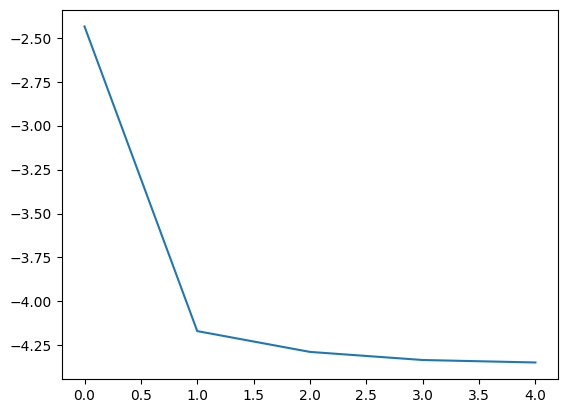

In [42]:
plt.plot(list(map(x,np.array(loss_list))))

In [133]:
torch.save(transformer.state_dict(),f"model_save/model_batch_100_seq64_layer6_hlayer6_dmodel384_token157_newd_cp2.pt" )

In [27]:
for i,j,k in dataloader:
    print(j)

tensor([[130, 149, 142,  51, 143, 134, 153, 149,  48,  49,  49,  52, 137, 148,
         131, 132,  51, 132, 147, 138, 148, 138, 148,  45, 105, 130, 141, 148,
         134,  52, 145, 147,  24,  48, 132, 144, 147, 143, 134, 147, 128, 148,
         149, 147, 134, 134, 149, 128, 130, 149, 142,  51, 143, 134, 153, 149,
          48,  49,  49,  52, 131, 147, 130, 143],
        [ 45, 143, 144, 133, 134,  51, 128, 136, 134, 149, 128, 133, 138, 148,
         149,  48, 144, 131, 139,  49,  52,  56,  56,  12, 133, 138, 148, 149,
         130, 143, 132, 134,  76, 142, 130, 153, 128, 133, 138, 148, 149,  21,
         133, 138, 148, 149, 130, 143, 132, 134,  75, 142, 138, 143, 128, 133,
         138, 148, 149,  50,  53, 147, 134, 148],
        [ 48,  70, 132, 144, 147, 143, 134, 147, 128, 148, 149, 147, 134, 134,
         149, 128, 130, 149, 142,  51, 143, 134, 153, 149,  48,  49,  11, 132,
         130, 148, 137,  47, 147, 130, 143, 136, 134,  48,  92,  49,  71,  49,
          52, 137, 148, 131, 13